In [33]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

#le arquivo csv 
data_apple = pd.read_csv('./data/2020-11-01_SP_DATA_APPLE_CLEAN')
data_apple = data_apple[['Data','Região','Dirigindo','Andando','Transito','Média']]

# converte coluna data para o tipo datetime
data_apple['Data'] = pd.to_datetime(data_apple['Data'])
data_apple.head(10)

Data     Região  Dirigindo  Andando  Transito       Média
0 2020-01-13  São Paulo     100.00   100.00    100.00  100.000000
1 2020-01-14  São Paulo     103.97   111.06    103.28  106.103333
2 2020-01-15  São Paulo     104.59   110.09    107.25  107.310000
3 2020-01-16  São Paulo     104.15   100.63    101.29  102.023333
4 2020-01-17  São Paulo     109.81   105.01     96.59  103.803333
5 2020-01-18  São Paulo     105.41   100.21     77.36   94.326667
6 2020-01-19  São Paulo      85.12    69.45     64.54   73.036667
7 2020-01-20  São Paulo     102.18   106.99    105.88  105.016667
8 2020-01-21  São Paulo     104.80   114.40    112.42  110.540000
9 2020-01-22  São Paulo     103.46   109.23    109.34  107.343333

In [34]:
data_apple.describe()

Dirigindo     Andando    Transito       Média
count  547.000000  547.000000  547.000000  547.000000
mean    78.873510   63.846563   51.984004   64.901359
std     26.775256   31.729466   32.560259   29.250177
min     24.550000   15.690000   12.690000   18.600000
25%     55.545000   35.950000   23.975000   39.511667
50%     82.590000   58.810000   44.040000   62.663333
75%    100.480000   83.020000   66.435000   83.116667
max    140.130000  159.920000  132.140000  135.703333

## Visualização da distribuição de variáveis

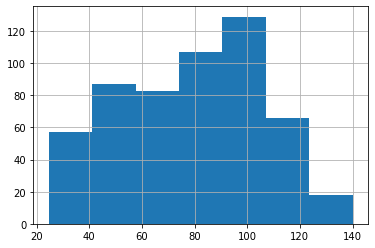

In [35]:
data_apple['Dirigindo'].hist(bins=7)

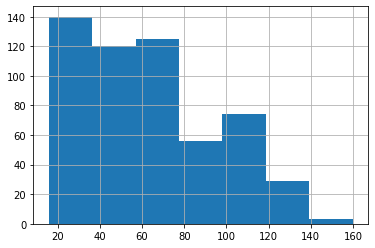

In [36]:
data_apple['Andando'].hist(bins=7)

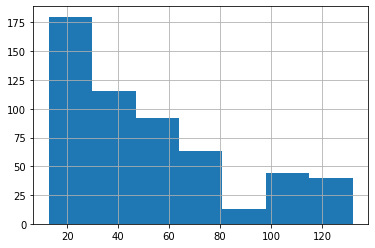

In [37]:
data_apple['Transito'].hist(bins=7)

Vemos então que há uma maior concentração de pessoas dirigindo, quando comparado as outras duas variáveis. O que faz sentido, considerando ser um efeito da quarentena. 

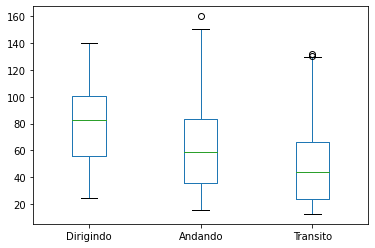

In [38]:
data_apple[['Dirigindo', 'Andando', 'Transito']].plot.box()

## Análise da correlação entre as variáveis

In [39]:
df_corr = data_apple.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001563A2A4D30>,
      dtype=object)

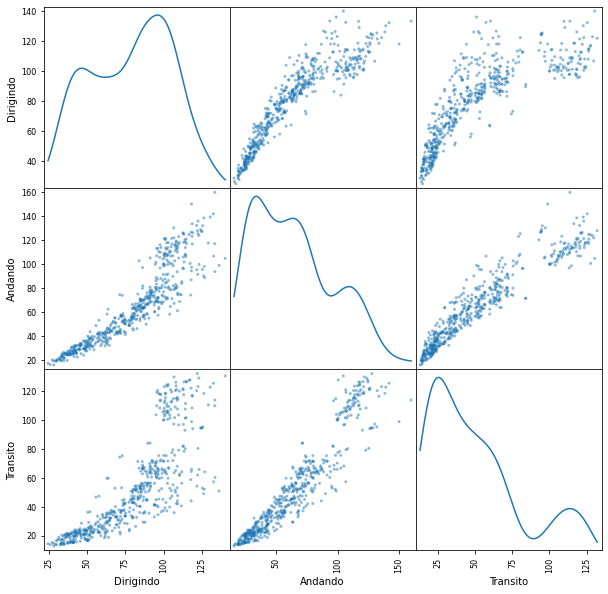

In [42]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_apple[['Dirigindo','Andando','Transito']], figsize=(10, 10), diagonal='kde')

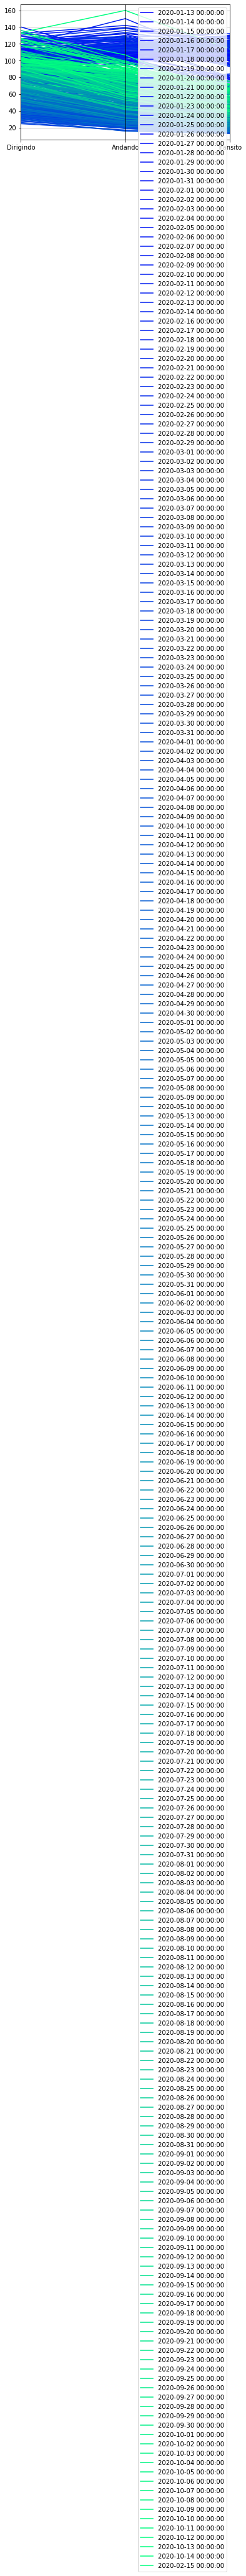

In [59]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(data_apple[['Data','Dirigindo','Andando','Transito']], 'Data', colormap='winter')

In [57]:
data_apple.plot.barh(x='Data', y=['Dirigindo','Andando','Transito'])

In [45]:
data_apple.set_index('Data').sort_index()[['Dirigindo', 'Andando', 'Transito']].plot()

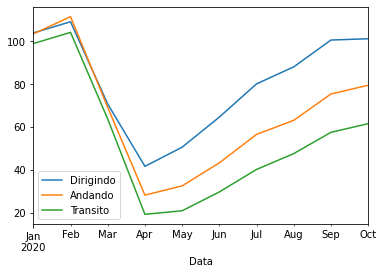

In [49]:
periodo = data_apple.Data.dt.to_period("M") 
data_apple.groupby(periodo)[['Dirigindo', 'Andando', 'Transito']].mean().plot()